In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 178MB/s]
100% 1.06G/1.06G [00:07<00:00, 152MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

# Importing necessary Libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
# generators: divides our data in batches (big datas)
# process the datas in batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',           # it will assign 0 to cats and 1 to dogs
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',           # it will assign 0 to cats and 1 to dogs
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


> the images are stored in numpy array format, the problem is numpy array's value falls under the range 0-255, we have to scale it upto 0-1. So basically we have to **Normalize**.

In [6]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

#Create CNN model
>So we will create such architecture where there will be 3 convilutional layers,
>> * 1st layer = 32 filters
* 2nd layer = 64 filter
* 3rd layer = 128 filters

In [7]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 59s 82ms/step - loss: 0.6122 - accuracy: 0.6551 - val_loss: 0.5082 - val_accuracy: 0.7554
Epoch 2/10
625/625 [==============================] - 49s 79ms/step - loss: 0.4825 - accuracy: 0.7703 - val_loss: 0.4625 - val_accuracy: 0.7818
Epoch 3/10
625/625 [==============================] - 54s 87ms/step - loss: 0.3794 - accuracy: 0.8296 - val_loss: 0.4730 - val_accuracy: 0.7894
Epoch 4/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2476 - accuracy: 0.8946 - val_loss: 0.6075 - val_accuracy: 0.7744
Epoch 5/10
625/625 [==============================] - 51s 80ms/step - loss: 0.1401 - accuracy: 0.9452 - val_loss: 0.7967 - val_accuracy: 0.7790
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0884 - accuracy: 0.9681 - val_loss: 1.0200 - val_accuracy: 0.7778
Epoch 7/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0590 - accuracy: 0.9801 - val_loss: 1.1325 - val_accuracy:

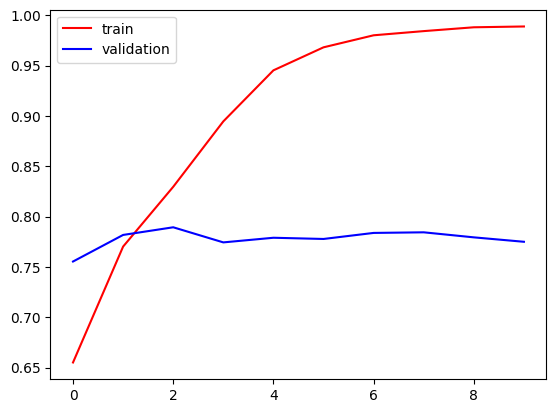

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

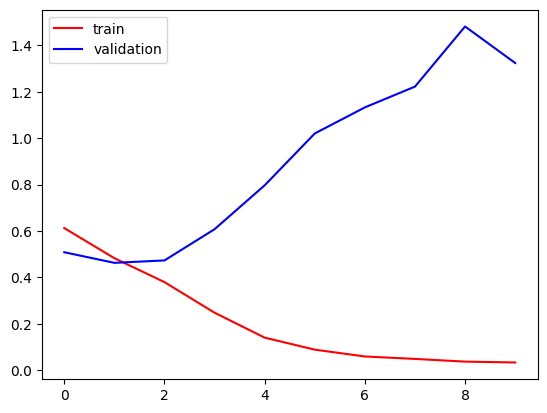

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

> By observing both of the graphs we can infer that there is overfitting in the dataset, due to which there is so drastic difference in the train and validation set

# Ways to reduce Overfitting
>* Add more data
* Data Augmentation
* L1/L2 Regularizer
* Dropout
* Batch Normalization
* Reduce complexity

> We will be using Dropout and Batch Normalization

In [13]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 69s 104ms/step - loss: 1.2078 - accuracy: 0.6038 - val_loss: 0.5964 - val_accuracy: 0.6784
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5666 - accuracy: 0.7087 - val_loss: 0.5740 - val_accuracy: 0.6788
Epoch 3/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4963 - accuracy: 0.7621 - val_loss: 1.0005 - val_accuracy: 0.6112
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4326 - accuracy: 0.7987 - val_loss: 0.6886 - val_accuracy: 0.6772
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3633 - accuracy: 0.8430 - val_loss: 0.5826 - val_accuracy: 0.7464
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2881 - accuracy: 0.8769 - val_loss: 0.6011 - val_accuracy: 0.7560
Epoch 7/10
625/625 [==============================] - 66s 104ms/step - loss: 0.2072 - accuracy: 0.9162 - val_loss: 0.6261 - val_ac

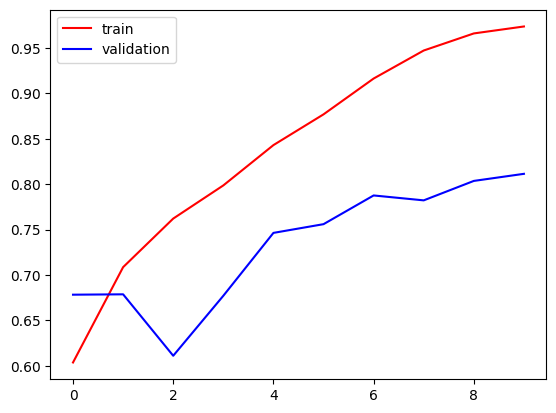

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

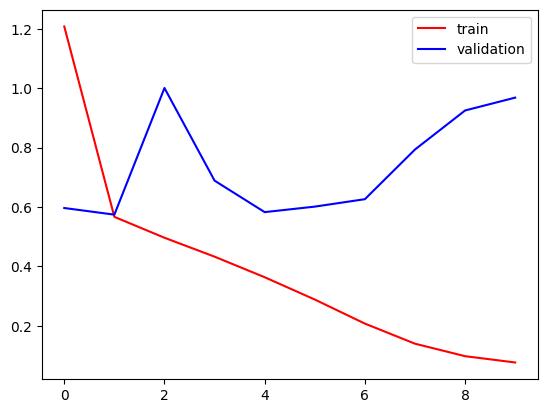

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [19]:
model = Sequential()

# Layer 1
model.add(Conv2D(10,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Layer 2
model.add(Conv2D(20,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Layer 3
model.add(Conv2D(40,kernel_size=(3,3),padding='valid',activation='relu',))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# Layer 4
model.add(Conv2D(80,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 20)      1820      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 62, 62, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 40)        7240      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 40)       

In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 49s 71ms/step - loss: 0.6259 - accuracy: 0.6417 - val_loss: 0.5058 - val_accuracy: 0.7548
Epoch 2/10
625/625 [==============================] - 40s 64ms/step - loss: 0.4728 - accuracy: 0.7724 - val_loss: 0.4170 - val_accuracy: 0.8084
Epoch 3/10
625/625 [==============================] - 39s 63ms/step - loss: 0.4013 - accuracy: 0.8169 - val_loss: 0.3823 - val_accuracy: 0.8264
Epoch 4/10
625/625 [==============================] - 41s 65ms/step - loss: 0.3357 - accuracy: 0.8516 - val_loss: 0.3717 - val_accuracy: 0.8410
Epoch 5/10
625/625 [==============================] - 42s 67ms/step - loss: 0.2685 - accuracy: 0.8859 - val_loss: 0.4390 - val_accuracy: 0.8158
Epoch 6/10
625/625 [==============================] - 43s 68ms/step - loss: 0.1954 - accuracy: 0.9202 - val_loss: 0.5161 - val_accuracy: 0.8342
Epoch 7/10
625/625 [==============================] - 39s 62ms/step - loss: 0.1507 - accuracy: 0.9396 - val_loss: 0.5751 - val_accuracy:

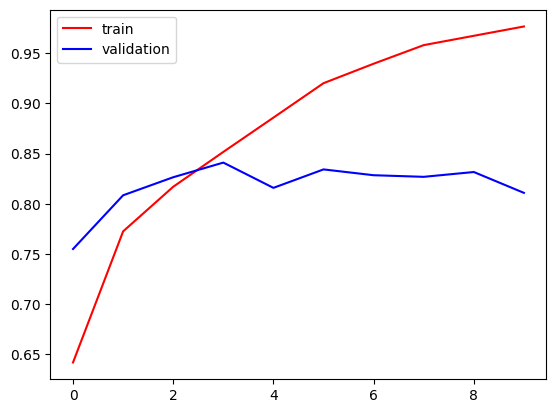

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


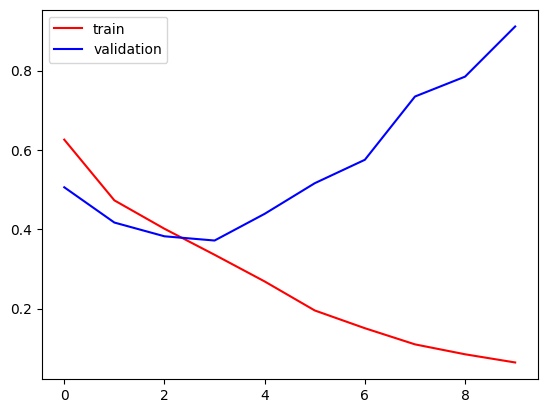

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
import cv2

In [26]:
test_img = cv2.imread('/content/dog.jpg')

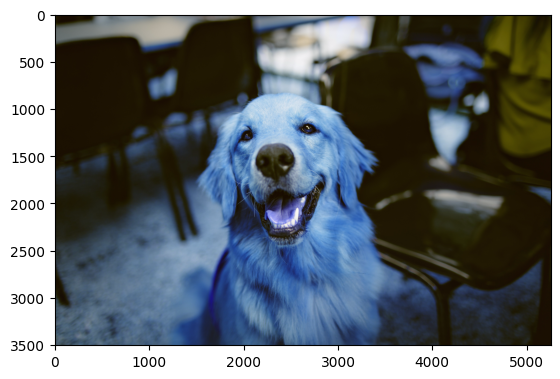

In [27]:
plt.imshow(test_img)

In [28]:
test_img.shape

(3505, 5257, 3)

In [29]:
test_img = cv2.resize(test_img,(256,256))

In [30]:
test_input = test_img.reshape((1,256,256,3))

In [31]:
model.predict(test_input)

1/1 [==============================] - 0s 389ms/step


array([[1.]], dtype=float32)

In [32]:
test_img2 = cv2.imread('/content/cat.jpg')

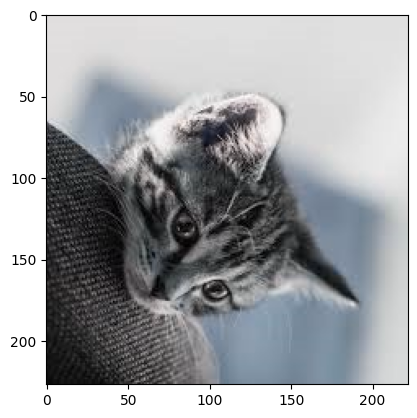

In [33]:
plt.imshow(test_img2)

In [34]:
test_img2.shape

(227, 222, 3)

In [35]:
test_img2 = cv2.resize(test_img2,(256,256))

In [36]:
test_input2 = test_img2.reshape((1,256,256,3))

In [37]:
model.predict(test_input2)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)